# Importing Libraries

In [1]:
import torch
#from torch import nn
#from torchvision import datasets, models, transforms
from torchvision import models, transforms

#import numpy as np

#import requests

import matplotlib as mpl
#import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from PIL import Image, ImageOps

#from git.repo.base import Repo
#from itertools import chain
#import random
import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages

## VGG19

In [8]:
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the features of the pre-trained VGG19 model from PyTorch")

statements = [
    """
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)
"""
]
tabulation.statement_generator(statements)

variables = ["VGG19"]
values = [str(VGG19)]
tabulation.variable_generator(variables, values)

Loading the features of the pre-trained VGG19 model from PyTorch

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | VGG19 = models.vgg19(weights="DEFAULT").features |
    |                                                  |
    | for param in VGG19.parameters():                 |
    |     param.requires_grad_(False)                  |
    +--------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | VGG19    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |
    |          |   (1): ReLU(inplace=True)                       |
    |    

In [9]:
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Enabling GPU training acceleration for the pre-trained VGG19 model")

statements = [
    """
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["device", "model"]
values = [str(device), str(model)]
tabulation.variable_generator(variables, values)

expressions = ["device.index"]
results = [str(device.index)]
tabulation.expression_generator(expressions, results)

Enabling GPU training acceleration for the pre-trained VGG19 model

    +---------------------------------------------------+
    | Statement                                         |
    +---------------------------------------------------+
    | device = torch.device("mps:0" if                  |
    |     torch.backends.mps.is_available() else "cpu") |
    |                                                   |
    | model = VGG19.to(device)                          |
    +---------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | device   | mps:0                                           |
    | model    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |

## Image Transforms

In [10]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load and transform an image from a specified "
    "file path into a resizable 4D tensor")

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load and transform an image from a specified file path into a resizable 4D tensor

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     in_transform = transforms.Compose([                  |
    |         transforms.Resize(size),                         |
    |         transforms.ToTensor(),             

In [11]:
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg").to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of content and style images")

statements = [
    """
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg").to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["content", "style"]
values = [
    str(reprlib_rules.repr(content.cpu())),
    str(reprlib_rules.repr(style.cpu()))
]
tabulation.variable_generator(variables, values, 12)

expressions = ["content.shape", "style.shape"]
results = [str(content.shape), str(style.shape)]
tabulation.expression_generator(expressions, results)

Loading and transformation of content and style images

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | content =                                                   |
    |     load_image("../Images/city_night_view.jpg").to(device)  |
    | style =                                                     |
    |     load_image("../Images/The_Starry_Night.jpg").to(device) |
    +-------------------------------------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | content  | tensor([[[[-0.7255, -0.7569, -0.7647,  ...,  |
    |          |             -0.7490, -0.7647, -0.7647],      |
    |          |           [-0.7333, -0.7490, -0.7255,  ...,  |
    |          |

In [12]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.squeeze()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to convert a copied 4D tensor into a displayable "
    "3D array in CPU memory")

definitions = [
    """
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.squeeze()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image
"""
]

tabulation.definition_generator(definitions)

Function definition to convert a copied 4D tensor into a displayable 3D array in CPU memory

    +---------------------------------------------------+
    | Definition                                        |
    +---------------------------------------------------+
    | def im_convert(tensor):                           |
    |     image = tensor.cpu().clone().detach().numpy() |
    |     image = image.squeeze()                       |
    |     image = image.transpose(1, 2, 0)              |
    |     image = image * np.array((0.5, 0.5, 0.5)) +   |
    |     np.array((0.5, 0.5, 0.5))                     |
    |     image = image.clip(0, 1)                      |
    |     return image                                  |
    +---------------------------------------------------+


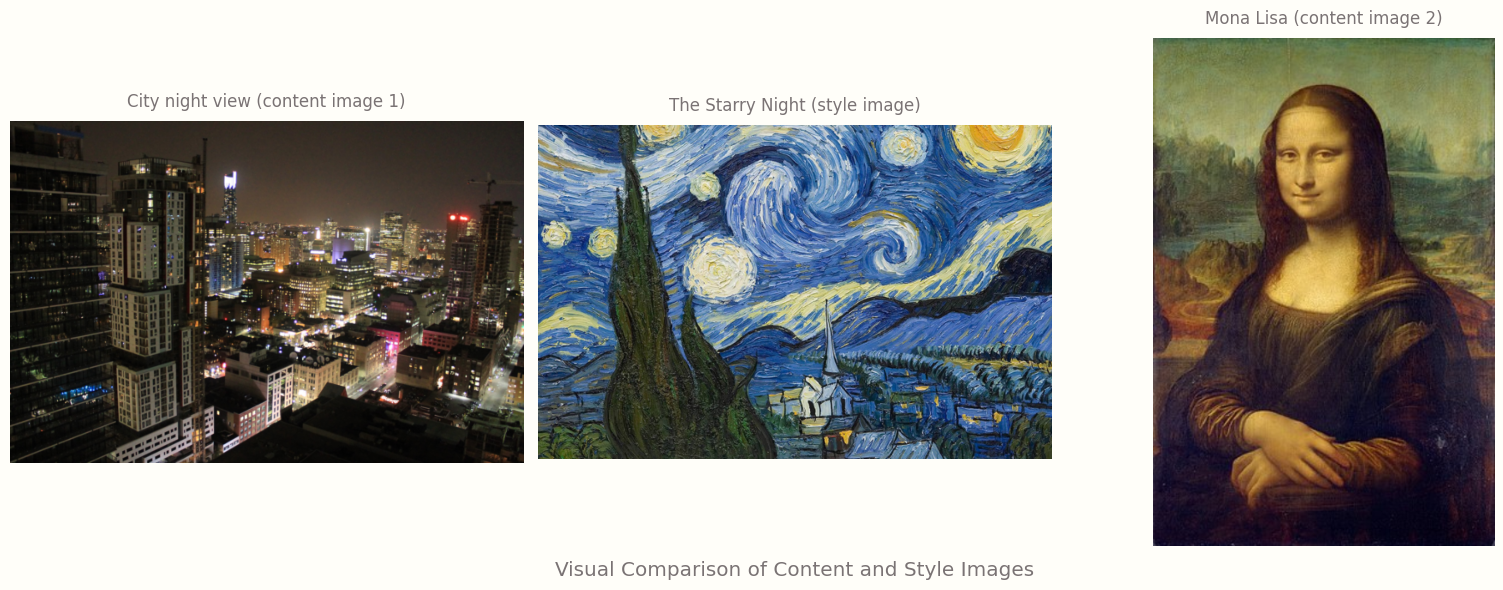

In [13]:
content_ = load_image("../Images/Mona_Lisa.jpg").to(device)

fig, (ax1, ax2, ax3) = plt.subplots(1,
                                    3,
                                    figsize=(figure_size[0],
                                             figure_size[1] / 3 * 2))

ax1.imshow(im_convert(content))
ax1.set_title("City night view (content image 1)", loc="center", pad=10)
ax1.axis("off")

ax2.imshow(im_convert(style))
ax2.set_title("The Starry Night (style image)", loc="center", pad=10)
ax2.axis("off")

ax3.imshow(im_convert(content_))
ax3.set_title("Mona Lisa (content image 2)", loc="center", pad=10)
ax3.axis("off")

fig.suptitle("Visual Comparison of Content and Style Images",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [14]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load and transform an image from a specified "
    "file path into a resizable and adjustable 4D tensor")

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load and transform an image from a specified file path into a resizable and adjustable 4D tensor

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     if shape is not None:                                |
    |         size = shape                                     |
    |                             

In [15]:
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg",
                   shape=content.shape[-2:]).to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Reloading and transformation of content and style images")

statements = [
    """
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg",
                   shape=content.shape[-2:]).to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["content", "style"]
values = [
    str(reprlib_rules.repr(content.cpu())),
    str(reprlib_rules.repr(style.cpu()))
]
tabulation.variable_generator(variables, values, 12)

expressions = ["content.shape", "style.shape"]
results = [str(content.shape), str(style.shape)]
tabulation.expression_generator(expressions, results)

Reloading and transformation of content and style images

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | content =                                                  |
    |     load_image("../Images/city_night_view.jpg").to(device) |
    | style = load_image("../Images/The_Starry_Night.jpg",       |
    |                    shape=content.shape[-2:]).to(device)    |
    +------------------------------------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | content  | tensor([[[[-0.7255, -0.7569, -0.7647,  ...,  |
    |          |             -0.7490, -0.7647, -0.7647],      |
    |          |           [-0.7333, -0.7490, -0.7255,  ...,  |
    |          |      

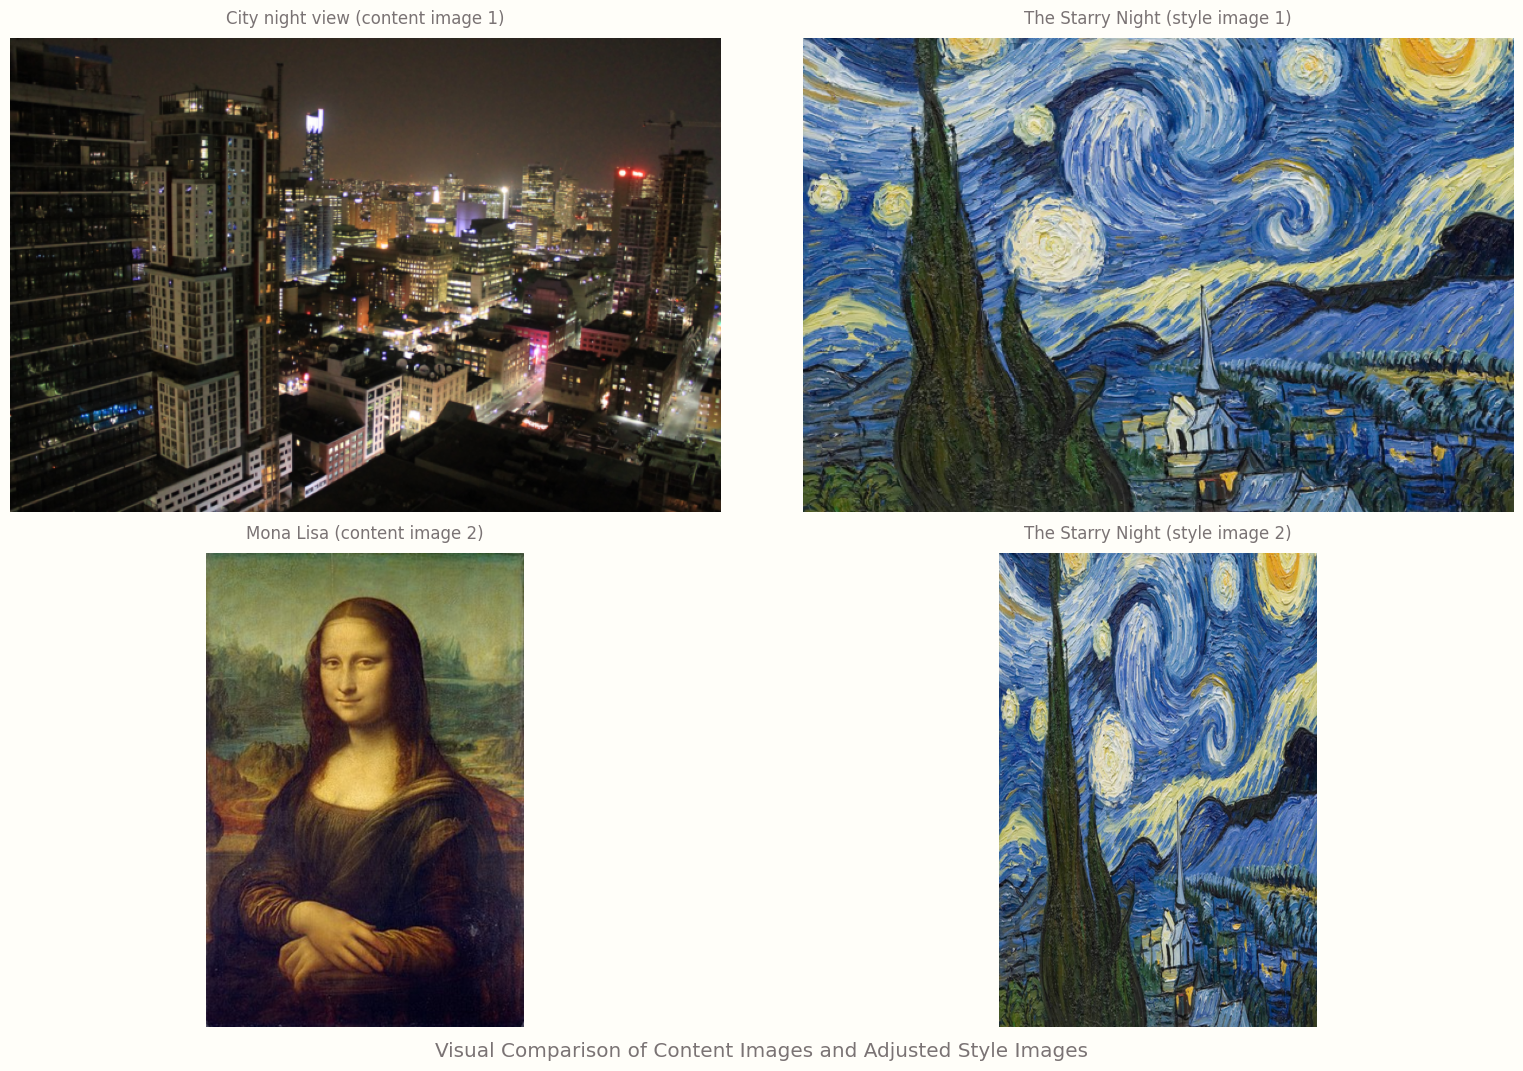

In [16]:
content_ = load_image("../Images/Mona_Lisa.jpg").to(device)
style_ = load_image("../Images/The_Starry_Night.jpg",
                    shape=content_.shape[-2:]).to(device)

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 5 * 6)

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(im_convert(content))
axs[0, 0].set_title("City night view (content image 1)", loc="center", pad=10)

axs[0, 1].imshow(im_convert(style))
axs[0, 1].set_title("The Starry Night (style image 1)", loc="center", pad=10)

axs[1, 0].imshow(im_convert(content_))
axs[1, 0].set_title("Mona Lisa (content image 2)", loc="center", pad=10)

axs[1, 1].imshow(im_convert(style_))
axs[1, 1].set_title("The Starry Night (style image 2)", loc="center", pad=10)

for ax in axs.flat:
    ax.axis("off")

fig.suptitle("Visual Comparison of Content Images and Adjusted Style Images",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

## Feature Extraction

In [17]:
def get_features(image, model):
    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1"
    }

    features = {}

    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image

    return features


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to extract style and content features")

definitions = [
    """
def get_features(image, model):
    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1"
    }

    features = {}

    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image

    return features
"""
]
tabulation.definition_generator(definitions)

Function definition to extract style and content features

    +------------------------------------------------+
    | Definition                                     |
    +------------------------------------------------+
    | def get_features(image, model):                |
    |     layers = {                                 |
    |         "0": "conv1_1",                        |
    |         "5": "conv2_1",                        |
    |         "10": "conv3_1",                       |
    |         "19": "conv4_1",                       |
    |         "21": "conv4_2",                       |
    |         "28": "conv5_1"                        |
    |     }                                          |
    |                                                |
    |     features = {}                              |
    |                                                |
    |     for name, layer in model._modules.items(): |
    |         image = layer(image)                   |
    | 

In [18]:
content_features = get_features(content, model)
style_features = get_features(style, model)

tabulation = Form_Generator()
tabulation.heading_printer("Feature extraction for content and style images")

statements = [
    """
content_features = get_features(content, model)
style_features = get_features(style, model)
"""
]
tabulation.statement_generator(statements)

variables = [
    "content_features",
    "style_features",
]
values = [
    str(
        reprlib_rules.repr({
            key: reprlib_rules.repr(value.cpu())
            for key, value in content_features.items()
        })),
    str(
        reprlib_rules.repr({
            key: reprlib_rules.repr(value.cpu())
            for key, value in style_features.items()
        }))
]
tabulation.variable_generator(variables, values, 1)

expressions = [
    "content_features.keys()", "len(content_features.keys())",
    "style_features.keys()", "len(style_features.keys())"
]
results = [
    str(content_features.keys()),
    str(len(content_features.keys())),
    str(style_features.keys()),
    str(len(style_features.keys()))
]
tabulation.expression_generator(expressions, results, 11)

Feature extraction for content and style images

    +-------------------------------------------------+
    | Statement                                       |
    +-------------------------------------------------+
    | content_features = get_features(content, model) |
    | style_features = get_features(style, model)     |
    +-------------------------------------------------+
    +------------------+----------------------------------------+
    | Variable         | Value                                  |
    +------------------+----------------------------------------+
    | content_features | {'conv1_1': 'tensor([[[[0...,          |
    |                  |  0.0000]]]])', 'conv2_1':              |
    |                  |  'tensor([[[[0..., 0.0000]]]])',       |
    |                  |  'conv3_1': 'tensor([[[[0...,          |
    |                  |  3.9621]]]])', 'conv4_1':              |
    |                  |  'tensor([[[[0..., 0.0000]]]])', ...}  |
    | style_features 

## The Gram Matrix

In [19]:
def gram_matrix(tensor):
    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram


tabulation = Form_Generator()
tabulation.heading_printer("Function definition to create the gram matrix")

definitions = [
    """
def gram_matrix(tensor):
    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram
"""
]
tabulation.definition_generator(definitions)

Function definition to create the gram matrix

    +-----------------------------------------+
    | Definition                              |
    +-----------------------------------------+
    | def gram_matrix(tensor):                |
    |     _, d, h, w = tensor.size()          |
    |     tensor = tensor.view(d, h * w)      |
    |     gram = torch.mm(tensor, tensor.t()) |
    |     return gram                         |
    +-----------------------------------------+


In [20]:
style_grams = {
    layer: gram_matrix(style_features[layer])
    for layer in style_features
}

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of the gram matrix dictionary for each layer of style features")

statements = [
    """
style_grams = {
    layer: gram_matrix(style_features[layer])
    for layer in style_features
}
"""
]
tabulation.statement_generator(statements)

variables = ["style_grams"]
values = [
    str(
        reprlib_rules.repr({
            key: reprlib_rules.repr(value.cpu())
            for key, value in style_grams.items()
        }))
]
tabulation.variable_generator(variables, values, 1)

expressions = ["style_grams.keys()", "len(style_grams.keys())"]
results = [str(style_grams.keys()), str(len(style_grams.keys()))]
tabulation.expression_generator(expressions, results, 11)

Creation of the gram matrix dictionary for each layer of style features

    +-----------------------------------------------+
    | Statement                                     |
    +-----------------------------------------------+
    | style_grams = {                               |
    |     layer: gram_matrix(style_features[layer]) |
    |     for layer in style_features               |
    | }                                             |
    +-----------------------------------------------+
    +-------------+---------------------------------------------+
    | Variable    | Value                                       |
    +-------------+---------------------------------------------+
    | style_grams | {'conv1_1': 'tensor([[2.5...7.1999e+04]])', |
    |             |  'conv2_1': 'tensor([[ 61...30448.4297]])', |
    |             |  'conv3_1': 'tensor([[ 79...33167.6562]])', |
    |             |  'conv4_1': 'tensor([[203...35915.9102]])', |
    |             |  ...}        

In [21]:
style_weights = {
    "conv1_1": 1.,
    "conv2_1": 0.75,
    "conv3_1": 0.2,
    "conv4_1": 0.2,
    "conv5_1": 0.2
}

tabulation = Form_Generator()
tabulation.heading_printer(
    "Initial weight settings for style features in each layer")

statements = [
    """
style_weights = {
    "conv1_1": 1.,
    "conv2_1": 0.75,
    "conv3_1": 0.2,
    "conv4_1": 0.2,
    "conv5_1": 0.2
}
"""
]
tabulation.statement_generator(statements)

variables = ["style_weights"]
values = [str(style_weights)]
tabulation.variable_generator(variables, values, 1)

expressions = ["style_weights.keys()", "len(style_weights.keys())"]
results = [str(style_weights.keys()), str(len(style_weights.keys()))]
tabulation.expression_generator(expressions, results, 11)

Initial weight settings for style features in each layer

    +----------------------+
    | Statement            |
    +----------------------+
    | style_weights = {    |
    |     "conv1_1": 1.,   |
    |     "conv2_1": 0.75, |
    |     "conv3_1": 0.2,  |
    |     "conv4_1": 0.2,  |
    |     "conv5_1": 0.2   |
    | }                    |
    +----------------------+
    +---------------+---------------------------------------------+
    | Variable      | Value                                       |
    +---------------+---------------------------------------------+
    | style_weights | {'conv1_1': 1.0, 'conv2_1': 0.75,           |
    |               |  'conv3_1': 0.2, 'conv4_1': 0.2, 'conv5_1': |
    |               |  0.2}                                       |
    +---------------+---------------------------------------------+
    +---------------------------+------------------------+
    | Expression                | Result                 |
    +------------------------

In [22]:
content_weight = 1
style_weight = 1e6

tabulation = Form_Generator()
tabulation.heading_printer(
    "Individual initial weight settings for content and style images")

statements = ["""
content_weight = 1
style_weight = 1e6
"""]
tabulation.statement_generator(statements)

variables = ["content_weight", "style_weight"]
values = [str(content_weight), str(style_weight)]
tabulation.variable_generator(variables, values)

Individual initial weight settings for content and style images

    +--------------------+
    | Statement          |
    +--------------------+
    | content_weight = 1 |
    | style_weight = 1e6 |
    +--------------------+
    +----------------+-----------+
    | Variable       | Value     |
    +----------------+-----------+
    | content_weight | 1         |
    | style_weight   | 1000000.0 |
    +----------------+-----------+


In [23]:
target = content.clone().requires_grad_(True).to(device)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of the target image")

statements = ["""
target = content.clone().requires_grad_(True).to(device)
"""]
tabulation.statement_generator(statements)

variables = ["target"]
values = [str(reprlib_rules.repr(target.cpu()))]
tabulation.variable_generator(variables, values, 12)

expressions = ["target.shape"]
results = [str(target.shape)]
tabulation.expression_generator(expressions, results)

Initialization of the target image

    +----------------------------------------------------------+
    | Statement                                                |
    +----------------------------------------------------------+
    | target = content.clone().requires_grad_(True).to(device) |
    +----------------------------------------------------------+
    +----------+---------------------------------------------+
    | Variable | Value                                       |
    +----------+---------------------------------------------+
    | target   | tensor([[[[-0.7255, -0.7569, -0.7647,  ..., |
    |          |             -0.7490, -0.7647, -0.7647],     |
    |          |           [-0.7333, -0.7490, -0.7255,  ..., |
    |          |             -0.7490...8745, -0.8510],       |
    |          |           [-0.5922, -0.6235, -0.7098,  ..., |
    |          |             -0.9686, -0.9451, -0.9373]]]],  |
    |          |        grad_fn=⟨ToCopyBackward0⟩)           |
    +----

## Optimization

In [24]:
optimizer = torch.optim.Adam([target], lr=0.003)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Initialization of optimizer by empirical observation")

statements = ["""
optimizer = torch.optim.Adam([target], lr=0.003)
"""]
tabulation.statement_generator(statements)

variables = ["optimizer"]
values = [str(optimizer)]
tabulation.variable_generator(variables, values)

Initialization of optimizer by empirical observation

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | optimizer = torch.optim.Adam([target], lr=0.003) |
    +--------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     foreach: None         |
    |           |     fused: False          |
    |           |     lr: 0.003             |
    |           |     maximize: False       |
    |           |

In [32]:
epochs = 2100
show_every = 300

content_losses, style_losses, total_losses = [], [], []
converted_targets = []

dataframe = DataFrame_Generator("epoch", "content loss", "style loss",
                                "total loss")

for epoch in range(1, epochs + 1):
    target_features = get_features(target, model)
    content_loss = torch.mean(
        (target_features['conv4_2'] - content_features['conv4_2'])**2)
    style_loss = 0

    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        style_gram = style_grams[layer]
        layer_style_loss = style_weights[layer] * torch.mean(
            (target_gram - style_gram)**2)
        _, d, h, w = target_feature.shape
        style_loss += layer_style_loss / (d * h * w)

    total_loss = content_weight * content_loss + style_weight * style_loss

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if epoch % show_every == 0:
        content_losses.append(content_loss.item())
        style_losses.append(style_loss.item())
        total_losses.append(total_loss.item())
        dataframe.updater(epoch, content_loss.item(), style_loss.item(),
                          total_loss.item())

        converted_targets.append(im_convert(target))

tabulation = Form_Generator()
tabulation.heading_printer(
    "Optimization process of style transfer for a specific number of epochs")

statements = [
    """
epochs = 2100
show_every = 300

content_losses, style_losses, total_losses = [], [], []
converted_targets = []

for epoch in range(1, epochs + 1):
    target_features = get_features(target, model)
    content_loss = torch.mean(
        (target_features['conv4_2'] - content_features['conv4_2'])**2)
    style_loss = 0

    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        style_gram = style_grams[layer]
        layer_style_loss = style_weights[layer] * torch.mean(
            (target_gram - style_gram)**2)
        _, d, h, w = target_feature.shape
        style_loss += layer_style_loss / (d * h * w)

    total_loss = content_weight * content_loss + style_weight * style_loss

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if epoch % show_every == 0:
        content_losses.append(content_loss.item())
        style_losses.append(style_loss.item())
        total_losses.append(total_loss.item())

        converted_targets.append(im_convert(target))
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "show_every", "content_losses", "style_losses", "total_losses",
    "converted_targets"
]
values = [
    str(epochs),
    str(show_every),
    str(content_losses),
    str(style_losses),
    str(total_losses),
    str(reprlib_rules.repr([target for target in converted_targets]))
]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Optimization process of style transfer for a specific number of epochs

    +---------------------------------------------------------+
    | Statement                                               |
    +---------------------------------------------------------+
    | epochs = 2100                                           |
    | show_every = 300                                        |
    |                                                         |
    | content_losses, style_losses, total_losses = [], [], [] |
    | converted_targets = []                                  |
    |                                                         |
    | for epoch in range(1, epochs + 1):                      |
    |     target_features = get_features(target, model)       |
    |     content_loss = torch.mean(                          |
    |         (target_features['conv4_2'] -                   |
    |     content_features['conv4_2'])**2)                    |
    |     style_loss = 0        

limit_output extension: Maximum message size of 10000 exceeded with 10212 characters

In [ ]:
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] * 2)

fig, axs = plt.subplots(4, 4)

for i in range(4):
    for j in range(4):
        if i == 0 and j == 0:
            
axs[0, 0].imshow(img_ant)
axs[0, 0].set_title("Original image (ant)", loc="center", pad=15)

inverted_img_ant = ImageOps.invert(img_ant)
axs[0, 1].imshow(inverted_img_ant)
axs[0, 1].set_title("Inverted image (ant)", loc="center", pad=15)

transformed_img_ant = transform(img_ant)
axs[0, 2].imshow(im_convert(transformed_img_ant))
axs[0, 2].set_title("Transformed image (ant)", loc="center", pad=15)

grayscale_img_ant = grayscale_image(img_ant)
axs[1, 0].imshow(grayscale_img_ant, cmap="binary_r")
axs[1, 0].set_title("Grayscale image (ant)", loc="center", pad=15)

axs[1, 1].imshow(grayscale_img_ant, cmap="binary")
axs[1, 1].set_title("Inverted grayscale image (ant)", loc="center", pad=15)

transformed_grayscale_img_ant = grayscale_image_conversion(
    grayscale_img_ant).permute(1, 2, 0)
axs[1, 2].imshow(transformed_grayscale_img_ant, cmap="binary_r")
axs[1, 2].set_title("Transformed grayscale image (ant)", loc="center", pad=15)
"""

axs[2, 0].imshow(img_bee)
axs[2, 0].set_title("Original image (bee)", loc="center", pad=15)

inverted_img_bee = ImageOps.invert(img_bee)
axs[2, 1].imshow(inverted_img_bee)
axs[2, 1].set_title("Inverted image (bee)", loc="center", pad=15)

transformed_img_bee = transform(img_bee)
axs[2, 2].imshow(im_convert(transformed_img_bee))
axs[2, 2].set_title("Transformed image (bee)", loc="center", pad=15)


grayscale_img_bee = grayscale_image(img_bee)
axs[3, 0].imshow(grayscale_img_bee, cmap="binary_r")
axs[3, 0].set_title("Grayscale image (bee)", loc="center", pad=15)

axs[3, 1].imshow(grayscale_img_bee, cmap="binary")
axs[3, 1].set_title("Inverted grayscale image (bee)", loc="center", pad=15)

transformed_grayscale_img_bee = grayscale_image_conversion(
    grayscale_img_bee).permute(1, 2, 0)
axs[3, 2].imshow(transformed_grayscale_img_bee, cmap="binary_r")
axs[3, 2].set_title("Transformed grayscale image (bee)", loc="center", pad=15)
"""

fig.suptitle("Visual Comparison of Different Forms of Grabbed Web Images",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [38]:
str(reprlib_rules.repr([reprlib_rules.repr(target) for target in converted_targets]))

"['array([[[0.3....08291221]]])', 'array([[[0.3....05719391]]])', 'array([[[0.3....04234475]]])', 'array([[[0.3....03107831]]])', 'array([[[0.3....0160073 ]]])', 'array([[[0.3....00364864]]])', ...]"

In [26]:
"""
height, width, channels = im_convert(target).shape
image_array = np.empty(shape=(300, height, width, channels))
capture_frame = steps / 300
counter = 0





variables = [
    "show_every", "optimizer", "steps", "height", "width", "channels",
    "image_array", "capture_frame", "counter"
]
values = [
    str(show_every),
    str(optimizer),
    str(steps),
    str(height),
    str(width),
    str(channels),
    str(reprlib_rules.repr(image_array)),
    str(capture_frame),
    str(counter)
]
tabulation.variable_generator(variables, values, 12)

expressions = ["im_convert(target).shape", "image_array.shape"]
results = [str(im_convert(target).shape), str(image_array.shape)]
tabulation.expression_generator(expressions, results)
"""
"""






    
    if step % show_every == 0:
        print('Total loss: ', total_loss.item())
        print('Iteration: ', step)
        plt.imshow(im_convert(target))
        plt.axis("off")
        plt.show()

    if step % capture_frame == 0:
        image_array[counter] = im_convert(target)
        counter = counter + 1
"""

'\n\n\n\n\n\n\n    \n    if step % show_every == 0:\n        print(\'Total loss: \', total_loss.item())\n        print(\'Iteration: \', step)\n        plt.imshow(im_convert(target))\n        plt.axis("off")\n        plt.show()\n\n    if step % capture_frame == 0:\n        image_array[counter] = im_convert(target)\n        counter = counter + 1\n'

In [28]:
content_features_ = get_features(content_, model)
style_features_ = get_features(style_, model)

style_grams_ = {
    layer: gram_matrix(style_features_[layer])
    for layer in style_features_
}

target_ = content_.clone().requires_grad_(True).to(device)